### 2019 Jun 20

I (Brian Jackson - bjackson@boisestate.edu) have coded up some of the tidal evolution equations derived in Ferraz-Mello et al. (2008 - https://arxiv.org/abs/0712.1156). If you just want the final answers, look at the boxed equations below.

Re-casting Equation (88) to reflect the planet and star properties and converting it into an equation for the average time evolution of semi-major axis $\dot{a}$ gives

$$
\langle \dot{a} \rangle = \dfrac{3 n k_{\rm d\star} m_{\rm p} R_\star^5 \epsilon_{\rm 0\star}}{m_\star a^4} \left( 1 + \frac{51}{4} e^2 \right) + \dfrac{3 n k_{\rm d\ p} m_\star R_{\rm p}^5 \epsilon_{\rm 2\ p}}{m_{\rm p} a^4} \left( 7 e^2 + S_{\rm p}^2 \right),
$$

where $n$ is the orbital mean motion ($2 \pi/P$ for $P$ the orbital period), $k_{\rm d}$ is the dynamical Love number of the star $\star$ or planet ${\rm p}$, $m_{\rm \star/p}$ is the stellar/planetary mass, $R_{\rm \star/p}$ the stellar/planetary radius, $\epsilon$ the lag angle for the body, $e$ the orbital eccentricity, and $S_{\rm p}$ the sine of the angle between the planet's equator and orbital plane, $I_{\rm p}$.

Note that this form of the equation assumes the star is rotating much more quickly than the planet revolves and that the planet is tidally locked to the star.

Often, we assume $k_{\rm d}\epsilon = k/Q = \frac{3}{2 Q^\prime}$, i.e., we incorporate the usually unknown Love number into the $Q$-value and used a so-called "modified tidal dissipation parameter". We can also usually assume $I = 0$ and $n \approx \left( G m_\star/a^3 \right)^{1/2}$ (i.e., $m_{\rm p} \ll m_\star$), giving

$$
\boxed{ \langle \dot{a} \rangle = \frac{9}{2} \left( \dfrac{G}{m_\star} \right)^{1/2} \left( \dfrac{m_{\rm p} R_\star^5}{Q_\star^\prime\ a^{11/2}} \right) \left( 1 + \frac{51}{4} e^2 \right) - \frac{63}{2} \left( G m_\star^3 \right)^{1/2} \left( \dfrac{R_{\rm p}^5}{m_{\rm p}\ Q_{\rm p}^\prime\  a^{11/2}} \right) e^2 }.
$$

We can make a similar series of substitutions and approximations to arrive at an analogous expression for the time evolution of the eccentricity $\dot{e}$:

$$
\boxed{ \langle \dot{e} \rangle = \frac{171}{16} \left( \dfrac{G}{m_\star} \right)^{1/2} \dfrac{e\ m_{\rm p} R_\star^5}{Q_\star^\prime\ a^{13/2}} - \frac{63}{4} \left( G m_\star^3 \right)^{1/2} \dfrac{e\ R_{\rm p}^5}{Q_{\rm p}^\prime\ m_{\rm p} a^{13/2}} }.
$$

In [1]:
%matplotlib inline

import numpy as np
import astropy.constants as c
import matplotlib.pyplot as plt

aspect_ratio = 16./9

In [2]:
def dadt_star_tide(Mstar=1.*c.M_sun, Rstar=1.*c.R_sun, Qstar=1e7, 
                   Mp=1.*c.M_jup, Rp=1.*c.R_jup, Qp=1e5, 
                   a=0.02*c.au, e=0.1):
    return 9./2*np.sqrt(c.G/Mstar)*(Mp*Rstar**5/a**(11./2)/Qstar)*(1. + 51./4*e**2)

def dadt_planet_tide(Mstar=1.*c.M_sun, Rstar=1.*c.R_sun, Qstar=1e7, 
                     Mp=1.*c.M_jup, Rp=1.*c.R_jup, Qp=1e5, 
                     a=0.02*c.au, e=0.1):
    return -63./2*np.sqrt(c.G*Mstar**3)*(Rp**5/Mp/a**(11./2)/Qp)*e**2
                                        
def dedt_star_tide(Mstar=1.*c.M_sun, Rstar=1.*c.R_sun, Qstar=1e7, 
                   Mp=1.*c.M_jup, Rp=1.*c.R_jup, Qp=1e5,
                   a=0.02*c.au, e=0.1):
    
    return 171./16*np.sqrt(c.G/Mstar)*(e*Mp*Rstar**5/a**(13./2)/Qstar)

def dedt_planet_tide(Mstar=1.*c.M_sun, Rstar=1.*c.R_sun, Qstar=1e7, 
                     Mp=1.*c.M_jup, Rp=1.*c.R_jup, Qp=1e5, 
                     a=0.02*c.au, e=0.1):
    return -63./4*np.sqrt(c.G*Mstar**3)*(e*Rp**5/Mp/a**(13./2)/Qp)

The examples below relate to three real planetary systems where the star is (K2-25, DS Tuc) or may be (KELT-17) rotating more quickly than the planet orbits. The first two are young systems, the latter is an example of one of the handful of planets known around an F star (another good example is HAT-P-57b).

K2-25: Thao et al. (in prep)

DS Tuc: Newton et al. (in prep)

KELT-17: https://iopscience.iop.org/article/10.3847/0004-6256/152/5/136

HAT-P-57: https://iopscience.iop.org/article/10.1088/0004-6256/150/6/197

TRAPPIST-1

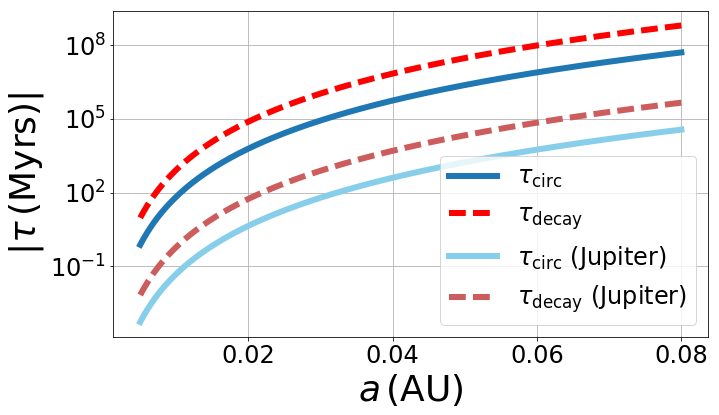

In [8]:
semimajor_axes = np.linspace(0.005, 0.08, 300)*c.au

system='trappist1'
if system=='k225':
    eccentricity = 0.2
    Mstar=0.3*c.M_sun
    Rstar=0.3*c.R_sun
    Mp=12.4*c.M_earth
    Rp=3.2*c.R_earth

    MpJ=1.0*c.M_jup
    RpJ=1.2*c.R_jup
    
elif system=='dstuc':
    eccentricity = 0.2
    Mstar=1.0*c.M_sun
    Rstar=0.87*c.R_sun
    Mp=28*c.M_earth
    Rp=5.7*c.R_earth

    MpJ=1.0*c.M_jup
    RpJ=1.2*c.R_jup
    
elif system=='kelt17':
    eccentricity = 0.2
    Mstar=1.6*c.M_sun
    Rstar=1.6*c.R_sun
    Mp=1.3*c.M_jup
    Rp=1.5*c.R_jup

    MpJ=1.0*c.M_jup
    RpJ=1.2*c.R_jup
    
elif system=='trappist1':
    eccentricity = 0.2
    Mstar=0.1*c.M_sun
    Rstar=0.1*c.R_sun
    Mp=1.*c.M_earth
    Rp=1.*c.R_earth

    MpJ=1.0*c.M_jup
    RpJ=1.2*c.R_jup
 
    
tau_circ = (eccentricity/(dedt_star_tide(a=semimajor_axes, e=eccentricity, Mstar=Mstar, Rstar=Rstar, Mp=Mp, Rp=Rp) +\
                                dedt_planet_tide(a=semimajor_axes, e=eccentricity, Mstar=Mstar, Rstar=Rstar, Mp=Mp, Rp=Rp))).to('Myr')

tau_decay = (semimajor_axes/(dadt_star_tide(a=semimajor_axes, e=eccentricity, Mstar=Mstar, Rstar=Rstar, Mp=Mp, Rp=Rp) +\
                                   dadt_planet_tide(a=semimajor_axes, e=eccentricity, Mstar=Mstar, Rstar=Rstar, Mp=Mp, Rp=Rp))).to('Myr')

tau_circJ = (eccentricity/(dedt_star_tide(a=semimajor_axes, e=eccentricity, Mstar=Mstar, Rstar=Rstar, Mp=MpJ, Rp=RpJ) +\
                                dedt_planet_tide(a=semimajor_axes, e=eccentricity, Mstar=Mstar, Rstar=Rstar, Mp=MpJ, Rp=RpJ))).to('Myr')

tau_decayJ = (semimajor_axes/(dadt_star_tide(a=semimajor_axes, e=eccentricity, Mstar=Mstar, Rstar=Rstar, Mp=Mp, Rp=Rp) +\
                                   dadt_planet_tide(a=semimajor_axes, e=eccentricity, Mstar=Mstar, Rstar=Rstar, Mp=MpJ, Rp=RpJ))).to('Myr')


fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.semilogy(semimajor_axes.to('au'), np.abs(tau_circ), lw=6, label="$\\tau_{\\rm circ}$")
ax.semilogy(semimajor_axes.to('au'), np.abs(tau_decay), ls='--', lw=6, color='red', label="$\\tau_{\\rm decay}$")

ax.semilogy(semimajor_axes.to('au'), np.abs(tau_circJ), lw=6, color='skyblue', label="$\\tau_{\\rm circ}$ (Jupiter)")
ax.semilogy(semimajor_axes.to('au'), np.abs(tau_decayJ), ls='--', lw=6, color='indianred', label="$\\tau_{\\rm decay}$ (Jupiter)")

ax.tick_params(which='both', labelsize=24)
ax.set_xlabel("$a\,({\\rm AU})$", fontsize=36)
ax.set_ylabel("$|\\tau \,({\\rm Myrs})|$", fontsize=36)
ax.grid(True)
ax.legend(loc='best', fontsize=24)



In [10]:
tau_circ

<Quantity [-7.52748243e-01, -1.03473643e+00, -1.40139435e+00,
           -1.87247877e+00, -2.47116044e+00, -3.22442619e+00,
           -4.16350830e+00, -5.32434146e+00, -6.74804819e+00,
           -8.48145316e+00, -1.05776269e+01, -1.30964594e+01,
           -1.61052646e+01, -1.96794155e+01, -2.39030110e+01,
           -2.88695751e+01, -3.46827879e+01, -4.14572506e+01,
           -4.93192834e+01, -5.84077575e+01, -6.88749619e+01,
           -8.08875048e+01, -9.46272506e+01, -1.10292293e+02,
           -1.28097962e+02, -1.48277875e+02, -1.71085014e+02,
           -1.96792848e+02, -2.25696495e+02, -2.58113914e+02,
           -2.94387145e+02, -3.34883582e+02, -3.79997291e+02,
           -4.30150361e+02, -4.85794302e+02, -5.47411482e+02,
           -6.15516602e+02, -6.90658221e+02, -7.73420311e+02,
           -8.64423866e+02, -9.64328545e+02, -1.07383437e+03,
           -1.19368344e+03, -1.32466173e+03, -1.46760091e+03,
           -1.62338020e+03, -1.79292830e+03, -1.97722530e+03,
        